Author: Omar Kawach

Outline
- Import packages
- Load data
- Plot data
- Gather basic information about the centres containing PACs
- Calculate accessibility measures using Euclidean distance
    - Also plot as needed

In [1]:
# Import packages
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
# All data are set to a common CRS 
ottawa = gpd.read_file("../ottawa-boundary/ottawa-boundary.shp").to_crs('epsg:4326')

In [3]:
pacs = gpd.read_file("../pacs/Publicly_Accessible_Computers.shp").to_crs('epsg:4326')
pacs.head()

,OBJECTID,SITE_NO,WIFI,SITENAME_E,ADDRESS_EN,ACCESSHOUR,COMPUTERS,ACCESSIBLE,ACCESSCRIT,LOCATIONTY,LOCATION_1,SITENAME_F,ADDRESS_FR,ACCESSHO_1,ACCESSCR_1,URL_EN,URL_FR,GLOBALID,geometry
0,1,32,wifi,Bibliothèque Ottawa Library - Cumberland,1599 Tenth Line,"Mon - Thurs 10-9, Fri 10-6, Sat 10-5, Sun closed",37,1,"Library card or ""internet only"" cards (for peo...",C. Ottawa Public Libraries,C. Bibliotheque publique d'Ottawa,Bibliothèque Ottawa Library - Cumberland,1599 Tenth Line,"lundi - jeudi 10h - 21h, vendredi 10h - 18h, s...",Carte de bibliothèque ou cartes pour 'Internet...,https://biblioottawalibrary.ca/en/branch/cumbe...,https://biblioottawalibrary.ca/fr/branch/cumbe...,{EEDBFA25-20AD-4654-A828-5D2032CFDD1C},POINT (-75.49361 45.47349)
1,2,33,wifi,Bibliothèque Ottawa Library - Elmvale Acres,1910 St-Laurent,"Mon-Thurs 10-8:30, Fri 1-6, Sat 10-5, closed Sun",14,1,"Library card or ""internet only"" cards (for peo...",C. Ottawa Public Libraries,C. Bibliotheque publique d'Ottawa,Bibliothèque Ottawa Library - Elmvale Acres,1910 St-Laurent,"lundi-jeudi 10h - 20h 30, vendredi 13h - 18h, ...",Carte de bibliothèque ou cartes pour 'Internet...,https://biblioottawalibrary.ca/en/branch/elmva...,https://biblioottawalibrary.ca/fr/branch/elmva...,{1ECC649B-E6E1-4E77-B8AB-FBEAE04E7DC9},POINT (-75.62495 45.39944)
2,3,34,wifi,Bibliothèque Ottawa Library - Emerald Plaza,1547 Merivale,"Mon-Thurs 10-8:30, Fri 1-6, Sat 10-5, closed Sun",12,1,"Library card or ""internet only"" cards (for peo...",C. Ottawa Public Libraries,C. Bibliotheque publique d'Ottawa,Bibliothèque Ottawa Library - Emerald Plaza,1547 Merivale,"lundi-jeudi 10h - 20h 30, vendredi 13h - 18h, ...",Carte de bibliothèque ou cartes pour 'Internet...,https://biblioottawalibrary.ca/en/branch/emera...,https://biblioottawalibrary.ca/fr/branch/emera...,{140EA763-8779-4EDA-BE26-7DB0EB7FBADD},POINT (-75.73328 45.35456)
3,4,35,wifi,Bibliothèque Ottawa Library - Fitzroy Harbour,100 Clifford Campbell,"Mon 5:30-8:30, Tues-Wed closed, Thurs 10-1 & 5...",2,1,"Library card or ""internet only"" cards (for peo...",C. Ottawa Public Libraries,C. Bibliotheque publique d'Ottawa,Bibliothèque Ottawa Library - Fitzroy Harbour,100 Clifford Campbell,"lundi 5:30-8:30, mardi-mercredi fermer, jeudi ...",Carte de bibliothèque ou cartes pour 'Internet...,https://biblioottawalibrary.ca/en/branch/fitzr...,https://biblioottawalibrary.ca/fr/branch/fitzr...,{4E867E03-5DBA-4ECA-B854-7C3954E3281A},POINT (-76.20619 45.47012)
4,5,36,wifi,Bibliothèque Ottawa Library - Greely,1448 Meadow Dr,"Mon 10-1 & 4:30-8:30, Tues 10-1, Wed 10-1 & 4:...",4,1,"Library card or ""internet only"" cards (for peo...",C. Ottawa Public Libraries,C. Bibliotheque publique d'Ottawa,Bibliothèque Ottawa Library - Greely,1448 pomenade Meadow,"lundi 10h - 13h & 16h 30 - 20h 30, mardi 10h -...",Carte de bibliothèque ou cartes pour 'Internet...,https://biblioottawalibrary.ca/en/branch/greely,https://biblioottawalibrary.ca/fr/branch/greely,{9C26E76B-3BE3-41C6-9681-715A06828878},POINT (-75.55758 45.26132)


In [4]:
shelters = gpd.read_file("../ottawa-shelters/shelters.csv")
shelters = gdf(shelters, geometry=gpd.points_from_xy(shelters.Lon, shelters.Lat), crs='epsg:4326')
shelters.head()

C:\Users\omark\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,Location,Lat,Lon,geometry
0,Matthew House Ottawa,45.350385694079726,-75.76626662678389,POINT (-75.76627 45.35039)
1,Western Ottawa Community Resource Centre,45.30118577389354,-75.87966632559025,POINT (-75.87967 45.30119)
2,Shepherds of Good Hope(1),45.29297611591561,-75.86665752634255,POINT (-75.86666 45.29298)
3,Shepherds of Good Hope(2),45.43176944804156,-75.68862901781854,POINT (-75.68863 45.43177)
4,Carling Family Shelter,45.35704549758195,-75.80354111513182,POINT (-75.80354 45.35705)


In [5]:
# Count the number of features for each dataset of interest
print(f"Number of shelters in Ottawa: {len(shelters)}\n")
print(f"Number of PACs in Ottawa: {len(pacs)}")

Number of shelters in Ottawa: 15

Number of PACs in Ottawa: 87


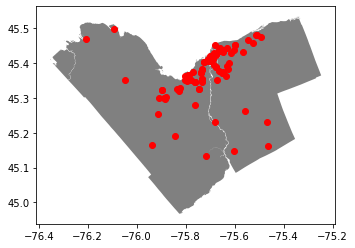

In [6]:
# Plot all PACs in Ottawa
fig, ax = plt.subplots()
ottawa.plot(ax=ax, facecolor='gray');
pacs.plot(ax=ax, facecolor='red');

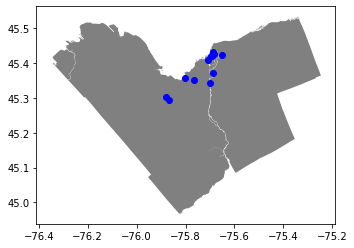

In [7]:
# Plot all shelters in Ottawa
fig, ax = plt.subplots()
ottawa.plot(ax=ax, facecolor='gray');
shelters.plot(ax=ax, facecolor='blue');

In [8]:
# Count the number of PACs with Wi-Fi
print(f"Number of PACs with Wi-Fi: {pacs['WIFI'].value_counts()[0]}")

Number of PACs with Wi-Fi: 44


In [9]:
# Left column is the number of PACs 
# Right column is the occurence of centre's having such number of PACs
print(pacs["COMPUTERS"].value_counts())

2     13
1     11
4      9
3      7
12     7
10     4
5      4
6      4
16     4
14     3
9      3
7      3
8      2
15     2
19     2
20     2
17     1
22     1
31     1
33     1
37     1
53     1
82     1
Name: COMPUTERS, dtype: int64


In [10]:
# The list above is already sorted so as expected the output will be "2" and "13"
print(f"# of PACs with the highest occurence: {pacs['COMPUTERS'].value_counts().idxmax()}\n")
print(f"Occurences: {pacs['COMPUTERS'].value_counts().tolist()[0]}")

# of PACs with the highest occurence: 2

Occurences: 13


In [11]:
# Find the highest number of PACs (not counting occurences in this case)
print(f"Highest number of PACs in a centre: {pacs['COMPUTERS'].max()}\n")

# Find the mean number of PACs (not counting occurences in this case as well)
print(f"Mean number of PACs: {pacs['COMPUTERS'].mean()}\n")

center_with_highest_pacs = pacs[pacs["COMPUTERS"] == pacs['COMPUTERS'].max()]
print(f"The centre with the highest number of PACs: {center_with_highest_pacs['SITENAME_E'].values[0]}\n")

# Check to see if this Centre also offers Wi-Fi
if(center_with_highest_pacs["WIFI"].str.contains("wifi").count() == 1):
    print(f"{center_with_highest_pacs['SITENAME_E'].values[0]} offers free Wi-Fi")
else:
    print(f"No free Wi-Fi access at {center_with_highest_pacs['SITENAME_E'].values[0]}")

Highest number of PACs in a centre: 82

The centre with the highest number of PACs: Bibliothèque Ottawa Library - Main

Bibliothèque Ottawa Library - Main offers free Wi-Fi


In [12]:
# Do a simple task
# Find the distance between a center and a shelter

# Switch to a projected coordinate system commonly used in web applications
center_with_highest_pacs = pacs[pacs["COMPUTERS"] == pacs['COMPUTERS'].max()].to_crs(epsg=3857)
ysb = shelters[shelters["Location"] == "YSB"].to_crs(epsg=3857)
dist = ysb.geometry.values[0].distance(center_with_highest_pacs.geometry.values[0])

print(f"Distance between the two: {round(dist/1000, 2)}km")

Distance between the two: 7.79km


In [ ]:
"""

# 

#Find the closest PAC to each shelter

# New geodataframe containing...
shelters_with_closest_pacs = gpd.GeoDataFrame(columns=shelters.columns)

# Add new columns to geodataframe
shelters_with_closest_pacs["Closest_site"] = None
shelters_with_closest_pacs["Closest_km"] = None

# This can take some time to run...
index = 0
for shelter in shelters['Location']:
    sx = shelters.loc[shelters['Location'] == shelter].to_crs(epsg=3857)
    sx = sx.geometry.values[0]
    closest_site = ""
    closest_m = -1
    for pac in pacs['SITENAME_E']:
        px = pacs.loc[pacs['SITENAME_E'] == pac].to_crs(epsg=3857)
        px = px.geometry.values[0]
        dist = px.distance(sx)
        if(closest_m <= 0 or dist <= closest_m):
            closest_m = dist
            closest_site = pac
    
    # Append to data frame
    shelters_with_closest_pacs = shelters_with_closest_pacs.append(shelters.loc[shelters['Location'] == shelter])
    shelters_with_closest_pacs.loc[index, 'Closest_site'] = closest_site
    shelters_with_closest_pacs.loc[index, 'Closest_km'] = round(closest_m/1000, 2)
    index += 1

shelters_with_closest_pacs.head()

"""

In [ ]:
"""

# Number of PACs within 5000 meters of a shelter

# New geodataframe containing...
shelters_with_count_of_pacs = gpd.GeoDataFrame(columns=shelters.columns)

# Add new columns to geodataframe
shelters_with_count_of_pacs["pacs_5000m"] = None

# This can take some time to run...
index = 0
for shelter in shelters['Location']:
    sx = shelters.loc[shelters['Location'] == shelter].to_crs(epsg=3857)
    sx = sx.geometry.values[0]
    count_of_pacs = 0
    for pac in pacs['SITENAME_E']:
        px = pacs.loc[pacs['SITENAME_E'] == pac].to_crs(epsg=3857)
        px = px.geometry.values[0]
        px_num_pacs = pacs.loc[pacs['SITENAME_E'] == pac]["COMPUTERS"].values[0]
        dist = px.distance(sx)
        if(dist <= 5000):
            count_of_pacs += px_num_pacs
    
    # Append to data frame
    shelters_with_count_of_pacs = shelters_with_count_of_pacs.append(shelters.loc[shelters['Location'] == shelter])
    shelters_with_count_of_pacs.loc[index, 'pacs_5000m']  = count_of_pacs
    index += 1

shelters_with_count_of_pacs.head()

"""

In [ ]:
"""

# Mean distance from shelter to PAC centres

# New geodataframe containing...
shelters_with_mean_dist = gpd.GeoDataFrame(columns=shelters.columns)

# Add new columns to geodataframe
shelters_with_mean_dist["mean_dist_km"] = None

# Number of PAC Centres in Ottawa 
num_pac_centres = len(pacs)

# This can take some time to run...
index = 0
for shelter in shelters['Location']:
    sx = shelters.loc[shelters['Location'] == shelter].to_crs(epsg=3857)
    sx = sx.geometry.values[0]
    total_dist = 0
    for pac in pacs['SITENAME_E']:
        px = pacs.loc[pacs['SITENAME_E'] == pac].to_crs(epsg=3857)
        px = px.geometry.values[0]
        total_dist += px.distance(sx)
        
    # Append to data frame
    shelters_with_mean_dist = shelters_with_mean_dist.append(shelters.loc[shelters['Location'] == shelter])
    shelters_with_mean_dist.loc[index, 'mean_dist_km']  = round(((total_dist / 1000) / num_pac_centres), 2)
    index += 1

shelters_with_count_of_pacs.head()

"""